# Prétraitement des données de fabrication de ciment

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. Chargement du fichier
file_path = "data_Ciment.xlsx"

df = pd.read_excel(file_path)
print("Dimensions initiales :", df.shape)

Dimensions initiales : (74, 44)


In [4]:
# 2. Suppression des colonnes vides ou constantes
colonnes_vides = df.columns[df.isnull().sum() == df.shape[0]]
colonnes_constantes = [col for col in df.columns if df[col].nunique() <= 1]
colonnes_a_supprimer = list(set(colonnes_vides).union(colonnes_constantes))

print("Colonnes supprimées (vides ou constantes) :", colonnes_a_supprimer)
df.drop(columns=colonnes_a_supprimer, inplace=True)

Colonnes supprimées (vides ou constantes) : ['R', 'AH', 'X', 'AQ', 'V', 'AI']


In [5]:
# 3. Traitement des valeurs manquantes
# Séparation numérique et catégorique
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
colonnes_categoriques = df.select_dtypes(include=['object']).columns

# Imputation
imputer_num = SimpleImputer(strategy="mean")
df[colonnes_numeriques] = imputer_num.fit_transform(df[colonnes_numeriques])

imputer_cat = SimpleImputer(strategy="most_frequent")
df[colonnes_categoriques] = imputer_cat.fit_transform(df[colonnes_categoriques])

In [6]:
# 4. Standardisation des variables numériques
scaler = StandardScaler()
df[colonnes_numeriques] = scaler.fit_transform(df[colonnes_numeriques])

In [7]:
# 5. Aperçu final
df.head()

,A,B,C,D,E,F,G,H,I,J,...,AF,AG,AJ,AK,AL,AM,AN,AO,AP,AR
0,-3.511885,00:00:00,0.13617,-0.581346,Y,0.245881,1.098965,1.083063,0.686875,-0.071108,...,-0.879696,0.120315,-0.263721,-1.06575,-2.25183,-1.330585,-0.171362,-0.458751,-1.896634,0.031823
1,0.000000,01:00:00,0.13617,2.246839,N,0.245881,1.098965,1.083063,0.362934,0.064924,...,-0.879696,0.120315,-0.263721,-1.72725,-2.25183,-1.330585,-0.171362,-1.327964,-1.896634,0.087707
2,0.000000,02:00:00,0.13617,-0.526556,Y,0.245881,0.015054,1.083063,0.038993,0.745085,...,-0.879696,0.120315,-0.263721,-1.72725,-2.25183,-0.724242,-0.171362,0.410461,-1.896634,0.143592
3,0.000000,03:00:00,0.13617,-0.516120,Y,0.245881,0.015054,1.083063,0.362934,0.473021,...,-0.879696,0.120315,-0.263721,-0.40425,-2.25183,-0.117900,-0.171362,-1.327964,-1.896634,0.087707
4,0.000000,04:00:00,0.13617,-0.526556,Y,0.245881,0.015054,1.083063,0.362934,2.241438,...,0.012390,0.120315,-0.263721,-0.40425,-2.25183,-1.936927,-0.171362,-1.327964,-1.896634,0.003881


## 2. Analyse exploratoire

In [8]:
# Statistiques descriptives
print(df.describe().T)

    count          mean       std       min       25%           50%       75%  \
A    74.0  6.001206e-18  1.006826 -3.511885  0.000000  0.000000e+00  0.000000   
C    74.0  1.788359e-15  1.006826 -2.747426  0.136170  1.361698e-01  0.136170   
D    74.0 -2.713628e-17  1.006826 -0.633526 -0.536992 -4.861161e-01 -0.010972   
F    74.0 -1.635432e-15  1.006826 -4.179979  0.245881  2.458811e-01  0.245881   
G    74.0  3.660735e-16  1.006826 -2.152767  0.003764  1.505431e-02  0.015054   
H    74.0  6.762882e-15  1.006826 -2.003237 -0.267908  5.429602e-02  1.083063   
I    74.0 -2.694541e-15  1.006826 -2.012635 -0.716870  3.899292e-02  0.470915   
J    74.0 -6.036158e-15  1.006826 -1.975557 -0.309164 -7.732529e-15  0.064924   
K    74.0 -1.000896e-14  1.006826 -1.922096 -0.926478  6.914016e-02  1.064758   
L    74.0 -2.328468e-15  1.006826 -4.080640 -0.454583  0.000000e+00  0.499643   
M    74.0  5.172865e-15  1.006826 -2.183980 -0.386876 -3.868764e-01  0.511675   
N    74.0 -1.008203e-15  1.0

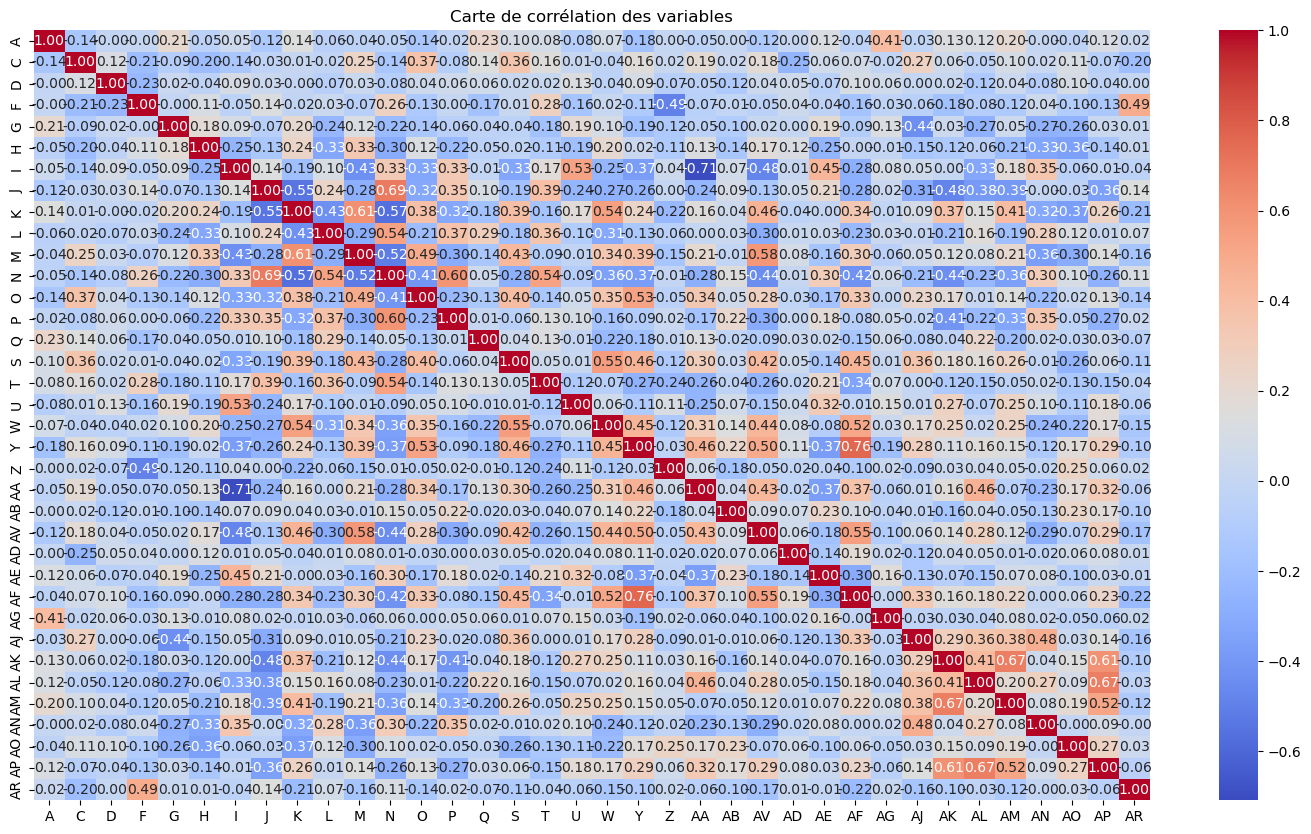

In [10]:
# Heatmap des corrélations
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection uniquement des colonnes numériques
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(18, 10))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Carte de corrélation des variables")
plt.show()


## 3. Application des algorithmes de Machine Learning

In [14]:
# Supposons que nous cherchons à prédire une variable cible (ex: colonne 'AR' ici)
# On peut adapter cette cellule selon la vraie variable cible choisie dans le jeu de données
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df.drop(columns=['AR'])  # À ajuster si besoin
y = df['AR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Régression linéaire
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Nettoyage automatique : suppression des colonnes non numériques
def nettoyer_donnees(X):
    # Supprimer les colonnes contenant des objets non numériques
    X = X.select_dtypes(include=['number'])
    return X

# Exemple de séparation X / y
# (à adapter selon ton jeu de données)
# X = df.drop(columns=['target'])
# y = df['target']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nettoyage des colonnes non numériques
X_train = nettoyer_donnees(X_train)
X_test = nettoyer_donnees(X_test)

# Régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Résultats
print("Régression Linéaire :")
print("R² :", r2_score(y_test, y_pred_lr))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Régression Linéaire :
R² : -175.35282843148886
RMSE : 1.6452931230430143


In [17]:
# Présentation sous forme de DataFrame des scores de performance
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

# ----------------------
# Entraînement des modèles
# ----------------------

# Régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Régression polynomiale (de degré 2 par exemple)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Arbre de décision
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# SVR (Support Vector Regression)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# ----------------------
# Tableau des résultats
# ----------------------

resultats = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Régression Polynomiale', 'Arbre de Décision', 'SVR'],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_svr)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_svr))
    ]
})

print(resultats)


                   Modèle          R2      RMSE
0     Régression Linéaire -175.352828  1.645293
1  Régression Polynomiale -194.617016  1.732828
2       Arbre de Décision -320.071987  2.220002
3                     SVR   -1.572270  0.198706


In [19]:
# Régression polynomiale (degré 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)

print("Régression Polynomiale:")
print("R²:", r2_score(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

Régression Polynomiale:
R²: -194.61701576893557
RMSE: 1.732827702465581


In [20]:
# Arbre de décision
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Arbre de Décision:")
print("R²:", r2_score(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Arbre de Décision:
R²: -320.2993057898291
RMSE: 2.2207872802089295


In [21]:
# Régression par vecteurs de support (SVM)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVR:")
print("R²:", r2_score(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

SVR:
R²: -1.572269834648385
RMSE: 0.1987057021854839
